In [2]:
from selenium import webdriver
driver=webdriver.Chrome('c:/playwithdata/chromedriver.exe')

In [3]:
import time
driver.get('https://www.instagram.com')
time.sleep(2)

In [4]:
def insta_searching(word):
    url='https://www.instagram.com/explore/tags/'+word
    return url

In [5]:
word='제주도맛집'
url=insta_searching(word)
driver.get(url)

In [8]:
def select_first(driver):
    first=driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(3)

select_first(driver)

In [10]:
import re
from bs4 import BeautifulSoup
import unicodedata

def get_content(driver):
    html=driver.page_source
    soup=BeautifulSoup(html,'lxml')
    
    try:
        content=soup.select('div.C4VMK>span')[0].text
        content=unicodedata.normalize('NFC',content)
    except:
        content=' '
    
    tags=re.findall(r'#[^\s#,\\]+',content)
    date=soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
    try:
        like=soup.select('div.Nm9Fw>button')[0].text[4:-1]
    except:
        like=0
    
    try:
        place=soup.select('div.M30cS')[0].text
        place=unicodedata.normalize('NFC',place)
    except:
        place=''
        
    data=[content,date,like,place,tags]
    return data

get_content(driver)

['산도롱맨도롱----------🍜갈비국수 대표맛집 🍜📌 100% 제주산 큼직한 우대갈비~!📌 진하게 우려낸 사골육수 베이스~!📌 비릿함이 1도없는 담백한 돔베고기~!..산도롱맨도롱동절기영업시간:08:00~20:00(last 19:00)✔매주 화요일은 휴무입니다✔문의 : 064-782-5105.#제주도맛집#제주맛집#제주도고기국수#성산일출봉맛집#광치기해변맛집#제주먹방#제주서귀포맛집#성산아침식사#성산일출봉아침식사',
 '2021-03-29',
 0,
 '',
 ['#제주도맛집',
  '#제주맛집',
  '#제주도고기국수',
  '#성산일출봉맛집',
  '#광치기해변맛집',
  '#제주먹방',
  '#제주서귀포맛집',
  '#성산아침식사',
  '#성산일출봉아침식사']]

In [12]:
def move_next(driver):
    right=driver.find_element_by_css_selector('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)
    
move_next(driver)

In [13]:
word="제주도맛집"
url=insta_searching(word)

driver.get(url)
time.sleep(3)

select_first(driver)

results=[ ]

target=500
for i in range(target):
    try:
        data=get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
        
print(results[:2])

[['산도롱맨도롱----------🍜갈비국수 대표맛집 🍜📌 100% 제주산 큼직한 우대갈비~!📌 진하게 우려낸 사골육수 베이스~!📌 비릿함이 1도없는 담백한 돔베고기~!..산도롱맨도롱동절기영업시간:08:00~20:00(last 19:00)✔매주 화요일은 휴무입니다✔문의 : 064-782-5105.#제주도맛집#제주맛집#제주도고기국수#성산일출봉맛집#광치기해변맛집#제주먹방#제주서귀포맛집#성산아침식사#성산일출봉아침식사', '2021-03-29', 0, '', ['#제주도맛집', '#제주맛집', '#제주도고기국수', '#성산일출봉맛집', '#광치기해변맛집', '#제주먹방', '#제주서귀포맛집', '#성산아침식사', '#성산일출봉아침식사']], ['#제주동쪽여행제주 동쪽 갈 때 여기 가보는 건 어때?맛집에 인생샷 건질 핫플까지 싸악 모아서😘하루 잡고 가도 모자라 계속 놀고싶을걸!@동쪽 정복하러 갈 사람 소환🙋🏻\u200d♂️..#제주맛집 #제주도맛집 #제주카페 #제주카페추천 #제주핫플 #제주도핫플 #제주핫플레이스 #제주도핫플레이스 #제주여행 #제주도여행 #제주여행코스 #제주도여행코스 #드르쿰다in성산 #별방진 #광치기해변', '2021-03-28', 0, '', ['#제주동쪽여행제주', '#제주맛집', '#제주도맛집', '#제주카페', '#제주카페추천', '#제주핫플', '#제주도핫플', '#제주핫플레이스', '#제주도핫플레이스', '#제주여행', '#제주도여행', '#제주여행코스', '#제주도여행코스', '#드르쿰다in성산', '#별방진', '#광치기해변']]]


In [15]:
import pandas as pd

results_df=pd.DataFrame(results)
results_df.columns=['content','data','like','place','tags']
results_df.to_excel('c:/files/1_crawling_jejudoMatJip.xlsx',index=False)

In [18]:
jeju_insta_df=pd.DataFrame([ ])

folder='c:/files/'
f_list=['1_crawling_jejudoMatJip.xlsx',
       '1_crawling_jejudoGwanGwang.xlsx',
       '1_crawling_jejuMatJip.xlsx',
       '1_crawling_jejuYeoHang.xlsx']

for fname in f_list:
    fpath=folder+fname
    temp=pd.read_excel(fpath)
    jeju_insta_df=jeju_insta_df.append(temp)
    
jeju_insta_df.columns=['content','data','like','place','tags']

In [19]:
jeju_insta_df.drop_duplicates(subset=['content'],inplace=True)
jeju_insta_df.to_excel('c:/files/1_crawling_raw.xlsx',index=False)

In [21]:
import pandas as pd
raw_total=pd.read_excel('c:/files/1_crawling_raw.xlsx')
raw_total['tags'][:3]

0    ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
1    ['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo...
2    ['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주...
Name: tags, dtype: object

In [23]:
tags_total=[ ]

for tags in raw_total['tags']:
    tags_list=tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [24]:
from collections import Counter
tag_counts=Counter(tags_total)

In [25]:
tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#일상', 701),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#선팔', 503),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#반영구', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397)]

In [26]:
STOPWORDS=['#일상','#선팔','#제주도','#jeju','#반영구','#제주자연눈썹',
          '#서귀포눈썹문신','#제주눈썹문신','#소통','#맞팔']

tag_total_selected=[ ]
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected=Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397),
 ('#먹스타그램', 395),
 ('#서귀포반영구', 395),
 ('#서귀포속눈썹', 395),
 ('#제주남자눈썹문신', 395),
 ('#서귀포자연눈썹', 395),
 ('#서귀포남자눈썹문신', 395),
 ('#카멜리아힐', 379)]

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32","win64"]:
    font_name="malgun gothic"
elif sys.platform=="darwin":
    font_name="AppleGothic"
    
rc('font',family=font_name)

In [31]:
tag_counts_df=pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns=['tags','counts']

<AxesSubplot:xlabel='counts', ylabel='tags'>

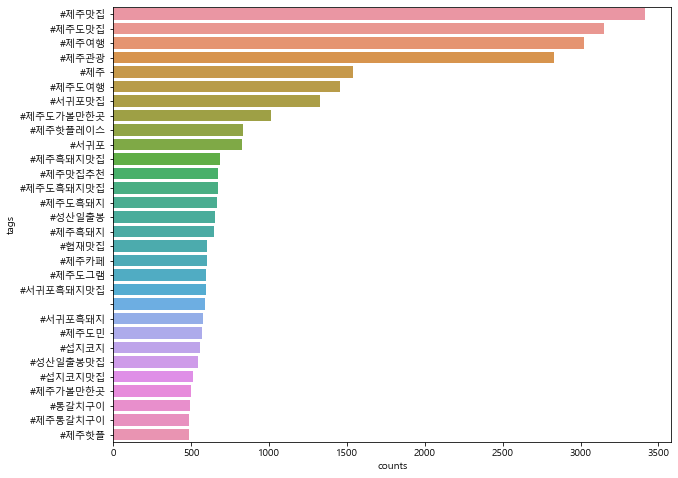

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(x='counts',y='tags',data=tag_counts_df)

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system()=='Windows':
    font_path="c:/Windows/Fonts/malgun.ttf"
elif platform.systme()=="Darwin":
    font_path="/Users/$USER/Library/Fonts/AppleGothic.ttf"

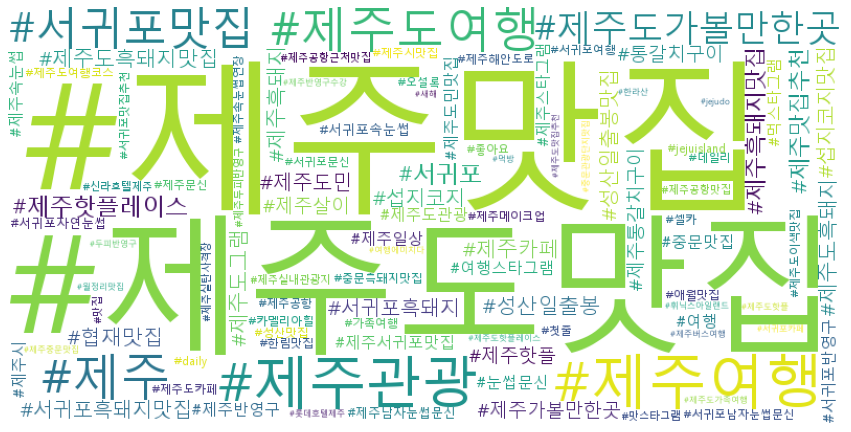

In [39]:
word_cloud=WordCloud(font_path=font_path,
                    background_color='white',
                    max_words=100,
                    relative_scaling=0.3,
                    width=800,
                    height=400).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.axis('off')
plt.savefig('c:/files/2_tag-wordcloud.png')

In [40]:
import pandas as pd
raw_total=pd.read_excel('c:/files/1_crawling_raw.xlsx')
raw_total.head()

,content,data,like,place,tags
0,제주도 도착~~공항근처 #제주분식 에서 먹은 첫식사만족만족!#제주맛집#제주도맛집#제...,2019-01-01,705,NaN,"['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛..."
1,﻿#함덕맛집 무거버거 바다 보면서 먹으니까 더 꿀맛👍🏻 #제주도카페투어#제주일상#함...,2019-01-01,384,NaN,"['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo..."
2,.대만족 제주스!.#동문시장#제주동문시장#제주도기념품#제주기념품#제주스는완벽#제주도...,2019-01-01,595,NaN,"['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주..."
3,#제주여행#2일차무거버거 제주와서 먹은것중에 제일 맛있었음!#제주도여행#제주맛집#함...,2019-01-01,412,NaN,"['#제주여행', '#2일차무거버거', '#제주도여행', '#제주맛집', '#함덕맛..."
4,"🥇1월 영업 안내🥇-1월 2일, 3일(수,목)은 쉬어갑니다-1월 4일,5일,6일(금...",2019-01-01,364,로타리과자점,[]


In [41]:
location_counts=raw_total['place'].value_counts()
location_counts

Jeju                    241
Jeju-do                 172
Jungle Book by Alice    101
Seogwipo                 65
제주도 크리스마스 박물관            59
                       ... 
호박다방                      1
선화동106-1                  1
협제 혜변                     1
유리네 식당                    1
플레이스엉물                    1
Name: place, Length: 1027, dtype: int64

In [42]:
location_counts_df=pd.DataFrame(location_counts)
location_counts_df.head()

,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59


In [43]:
location_counts_df.to_excel('c:/files/3_location_counts.xlsx')

In [46]:
locations=list(location_counts.index)
locations

['Jeju',
 'Jeju-do',
 'Jungle Book by Alice',
 'Seogwipo',
 '제주도 크리스마스 박물관',
 '제주에인감귤밭',
 'Jeju Island',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '폼포코식당_pompokokitchen',
 '1100고지',
 'Nimome',
 '월정리해변',
 '제주도 애월읍',
 '석부작박물관',
 '알뜨르 비행장',
 '카멜리아 힐',
 '고집돌우럭중문점',
 '제주 함덕 서우봉 해변',
 '제주레포츠랜드',
 '밥깡패',
 '위미동백나무군락지',
 '제주신화월드 Jeju Shinhwa World',
 '제주고궁한복카페 jeju gogung hanbok studio',
 '할로비치',
 '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地',
 'Woljeongri Beach',
 '협재해변 Beach',
 '연동 바오젠 거리',
 '고래배꼽',
 '새별오름',
 '용머리해안',
 '용눈이오름',
 '하이엔드 제주',
 '사려니숲길',
 '제주빅볼랜드',
 '김녕미로공원 Jeju Kimnyoung Maze Park',
 '캔디원',
 '제주커피박물관 Baum',
 'Jeju Aewol',
 '한라산',
 '서귀포 느영나영 게스트하우스',
 '위미동백나무군락',
 '휴애리 자연생활공원',
 '마마뜰',
 'Jeju Island 제주특별자치도 济州道',
 '위미2리 동백군락지',
 '삼무공원',
 '한라산 (漢拏山, Hallasan)',
 '서우봉',
 '광치기해변',
 '제주해남',
 '옹포별장가든',
 '성이시돌목장',
 '제주어린왕자게스트하우스',
 '월정리카페콧수염',
 '제주 송악산',
 '제주 꿈꾸는고래 스쿠버&게스트하우스',
 '카페브리프',
 '牛岛 Udo Island 우도',
 '아줄레주',
 '산굼부리',
 '에코랜드',
 '곽지해수욕장',
 '카페한라산',
 '르페도라펜션',
 '제주동문재래시장',
 'Hidden Cliff / 히든 클리프',
 

In [57]:
import requests

searching = '합정 스타벅스'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)

headers = {
    "Authorization": "KakaoAK eb955a1e81af0ad9489e6c745122b3d6"     
}

places = requests.get(url, headers = headers).json()['documents']
places

[{'address_name': '서울 마포구 서교동 395-166',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '26572121',
  'phone': '',
  'place_name': '스타벅스 서교점',
  'place_url': 'http://place.map.kakao.com/26572121',
  'road_address_name': '서울 마포구 양화로 78',
  'x': '126.916980454434',
  'y': '37.5514601750423'},
 {'address_name': '서울 마포구 합정동 472',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2057327896',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정점',
  'place_url': 'http://place.map.kakao.com/2057327896',
  'road_address_name': '서울 마포구 월드컵로1길 14',
  'x': '126.91253700818196',
  'y': '37.54994959743763'},
 {'address_name': '서울 마포구 서교동 490',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '288597324',
  'phone': '',
  'place_name': '스타벅스 합정폴리스R

In [58]:
def find_places(searching):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    headers = {
        "Authorization": "KakaoAK eb955a1e81af0ad9489e6c745122b3d6"     
    }
    places = requests.get(url, headers = headers).json()['documents']
    
    place=places[0]
    name=place['place_name']
    x=place['x']
    y=place['y']
    data=[name,x,y,searching]
    
    return data

In [59]:
data=find_places('제주공항')
data

['제주국제공항', '126.492769004244', '33.5070789578184', '제주공항']

In [62]:
import time
from tqdm.notebook import tqdm
locations_inform=[ ]
for location in tqdm(locations):
    try:
        data=find_places(location)
        locations_inform.append(data)
        time.sleep(0.5)
    except:
        pass
locations_inform

[['Jeju in aA', '126.83650369902168', '33.53833652360498', 'Jeju'],
 ['서귀포잠수함', '126.558616052674', '33.2393033784206', 'Seogwipo'],
 ['바이나흐튼 크리스마스박물관', '126.32785786016811', '33.2915720831759', '제주도 크리스마스 박물관'],
 ['제주에인감귤밭', '126.5390139270361', '33.25656069063887', '제주에인감귤밭'],
 ['제주도', '126.54587355630036', '33.379777816446165', 'Jeju Island'],
 ['한라산1100고지', '126.462219691112', '33.3580781709788', '1100고지'],
 ['월정리해수욕장', '126.795805057888', '33.556469394054', '월정리해변'],
 ['올레길 17코스(광령-제주원도심 올레)', '126.439341083568', '33.4608856490895', '제주도 애월읍'],
 ['석부작박물관', '126.536501983154', '33.2504031491774', '석부작박물관'],
 ['알뜨르비행장', '126.271527320164', '33.2047161778831', '알뜨르 비행장'],
 ['카멜리아힐', '126.370009467525', '33.2896344311608', '카멜리아 힐'],
 ['고집돌우럭 중문점', '126.416704762779', '33.2579811121134', '고집돌우럭중문점'],
 ['함덕해수욕장', '126.669238934013', '33.5430615661113', '제주 함덕 서우봉 해변'],
 ['제주레포츠랜드', '126.6387551242765', '33.48206819907232', '제주레포츠랜드'],
 ['밥깡패', '126.263436208895', '33.410093302084', '밥깡

In [63]:
locations_inform_df=pd.DataFrame(locations_inform)
locations_inform_df.columns=['네이버위치명','경도','위도','인스타위치명']
locations_inform_df.to_excel('c:/files/3_locations.xlsx',index=False)

In [64]:
location_counts_df=pd.read_excel('c:/files/3_location_counts.xlsx',index_col=0)
location_inform_df=pd.read_excel('c:/files/3_locations.xlsx')

In [66]:
location_data=pd.merge(locations_inform_df, location_counts_df,
                      how='inner',left_on='네이버위치명',right_index=True)
location_data.head()

,네이버위치명,경도,위도,인스타위치명,place
1,서귀포잠수함,126.558616052674,33.2393033784206,Seogwipo,1
376,서귀포잠수함,126.558616052674,33.2393033784206,서귀포잠수함,1
3,제주에인감귤밭,126.5390139270361,33.25656069063887,제주에인감귤밭,48
4,제주도,126.54587355630036,33.379777816446165,Jeju Island,4
85,제주도,126.54587355630036,33.379777816446165,제주도,4


In [67]:
location_data['네이버위치명'].value_counts()

오설록티뮤지엄     3
자매국수 본점     3
지붕위제주바다     2
도두항         2
용두암         2
           ..
블루마린하우스     1
뉴저지카페       1
우아당         1
제주오리엔탈호텔    1
썬앤문리조트      1
Name: 네이버위치명, Length: 397, dtype: int64

In [68]:
location_data=location_data.pivot_table(
    index=['네이버위치명','경도','위도'],
    values='place',
    aggfunc='sum')
location_data.head()

,,,place
네이버위치명,경도,위도,
702키친,126.534134232309,33.4988349625909,1
73st,126.455108846725,33.4569889392407,1
가드망제,126.532953970928,33.5009907353319,1
가시식당,126.771437983288,33.3530600681391,2
가시아방국수,126.91806478438669,33.43860508447686,2


In [69]:
location_data=pd.read_excel('c:/files/3_location_inform.xlsx')
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name_official  416 non-null    object 
 1   경도             417 non-null    float64
 2   위도             417 non-null    float64
 3   place          417 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 13.2+ KB


In [72]:
import folium

Mt_Hanla=[33.362500, 126.533694]
map_jeju=folium.Map(location=Mt_Hanla,zoom_start=11)

for i in range(len(location_data)):
    name=location_data['name_official'][i]
    count=location_data['place'][i]
    size=int(count)*2
    long=float(location_data['위도'][i])
    lat=float(location_data['경도'][i])
    folium.CircleMarker((long,lat),radius=size,color='red',popup=name).add_to(map_jeju)
    
map_jeju

In [73]:
map_jeju.save('c:/files/3_jeju.html')

In [76]:
from folium.plugins import MarkerCluster

locations = []
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i]  # 행 하나씩
    locations.append((float(data['위도']),float(data['경도'])))    # 위도 , 경도 순으로..
    names.append(data['name_official'])


Mt_Hanla =[33.362500, 126.533694]
map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 11)
                       
marker_cluster = MarkerCluster(
    locations=locations, popups=names,
    name='Jeju',
    overlay=True,
    control=True,

)

marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)

map_jeju2

In [77]:
map_jeju2.save('c:/files/3_jeju_cluster.html')

In [78]:
import pandas as pd
raw_total=pd.read_excel('c:/files/1_crawling_raw.xlsx')

In [81]:
select_word='해돋이'

check_list=[]
for content in raw_total['content']:
    if select_word in content:
        check_list.append(True)
    else:
        check_list.append(False)
        
select_df=raw_total[check_list]
select_df.head()

,content,data,like,place,tags
878,곽지스테이션안녕 반가워..2019년...붉은해의 기운을 받으세요. 얍얍얍!!!..#...,2019-01-01,31,곽지스테이션,"['#곽지스테이션', '#곽지해수욕장', '#해돋이', '#2019', '#기해년'..."
1552,제주에서 마지막 밥은...해물라면구름낀 날씨에 전국에서 제주빼고 다 보였다는 해돋이...,2019-01-01,13,NaN,"['#제주도', '#제주도맛집', '#성산일출봉맛집', '#제주경미네', '#경미네..."
1626,#제주 를 제외한 전국에서 해돋이를 볼수 있....에서의 그 제주.... 포기하고 ...,2019-01-01,45,광치기해변,"['#제주', '#호텔', '#빼꼼']"
1994,사장님 아침 대바람부터 문열어 주셔서 감사해요 ㅋㅋㅋㅋ 참 친절하셔요 또 방문 하고...,2019-01-01,114,Woljeongri Beach,"['#월정리', '#월정리해변', '#월정리맛집', '#밥세끼', '#제주도맛집',..."
2109,#어부피자 #2018년 찾아주셔서 #감사합니다#2019년도 더 더욱 #노력하는 어부...,2018-12-31,35,NaN,"['#어부피자', '#2018년', '#감사합니다', '#2019년도', '#노력하..."


In [82]:
for i in select_df.index:
    print(select_df.loc[i,'content'])
    print('-'*50)
select_df.head()

곽지스테이션안녕 반가워..2019년...붉은해의 기운을 받으세요. 얍얍얍!!!..#곽지스테이션#곽지해수욕장#해돋이#2019#기해년#새해인사#제주도맛집#해맞이#한라산#눈꽃 #새해복많이받으세요 #신년회 #1월1일 #중문맛집#성산일출봉#일출#비자림#용눈이오름#우도땅콩 #크림라떼#수제버거맛집 #피쉬앤칩스#카멜리아힐#곽지카페#애월카페#협제맛집#한림공원
--------------------------------------------------
제주에서 마지막 밥은...해물라면구름낀 날씨에 전국에서 제주빼고 다 보였다는 해돋이 보기 실패하고 ㅋㅋ비까지 오는 이 날씨에뜨끈한 해물라면 먹고 집에가자#제주도#제주도맛집#성산일출봉맛집#제주경미네#경미네#맛스타그램#먹스타그램#맛집#해물라면#문어라면
--------------------------------------------------
#제주 를 제외한 전국에서 해돋이를 볼수 있....에서의 그 제주.... 포기하고 #호텔 오니 #빼꼼 🌞
--------------------------------------------------
사장님 아침 대바람부터 문열어 주셔서 감사해요 ㅋㅋㅋㅋ 참 친절하셔요 또 방문 하고 싶을거 같아요ㅋ너무 친철하셔서#월정리 #월정리해변 #월정리맛집 #밥세끼 #제주도맛집 #jmt #신혼부부 #세화해변 #함덕해수욕장 #새해 #해돋이 #명소 #제주명소
--------------------------------------------------
#어부피자 #2018년 찾아주셔서 #감사합니다#2019년도 더 더욱 #노력하는 어부피자가 되겠습니다#2019년 #1월1일 #11시 #오픈합니다#해피뉴이얼~~ #제주도맛집#소통#선팔#맛팔#빛의벙커맛집#성산일출봉맛집#우도맛집#이영자맛집 되고픈집#2019년안녕#2018년바이#해돋이#1월#타임세트메뉴#가성비갑#제주필수코스 #복돼지#랍스타#딱새우#샐러드
--------------------------------------------------
이제까지 살면서 제일 행복했던일 제일 슬

,content,data,like,place,tags
878,곽지스테이션안녕 반가워..2019년...붉은해의 기운을 받으세요. 얍얍얍!!!..#...,2019-01-01,31,곽지스테이션,"['#곽지스테이션', '#곽지해수욕장', '#해돋이', '#2019', '#기해년'..."
1552,제주에서 마지막 밥은...해물라면구름낀 날씨에 전국에서 제주빼고 다 보였다는 해돋이...,2019-01-01,13,NaN,"['#제주도', '#제주도맛집', '#성산일출봉맛집', '#제주경미네', '#경미네..."
1626,#제주 를 제외한 전국에서 해돋이를 볼수 있....에서의 그 제주.... 포기하고 ...,2019-01-01,45,광치기해변,"['#제주', '#호텔', '#빼꼼']"
1994,사장님 아침 대바람부터 문열어 주셔서 감사해요 ㅋㅋㅋㅋ 참 친절하셔요 또 방문 하고...,2019-01-01,114,Woljeongri Beach,"['#월정리', '#월정리해변', '#월정리맛집', '#밥세끼', '#제주도맛집',..."
2109,#어부피자 #2018년 찾아주셔서 #감사합니다#2019년도 더 더욱 #노력하는 어부...,2018-12-31,35,NaN,"['#어부피자', '#2018년', '#감사합니다', '#2019년도', '#노력하..."
